In [7]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np 

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images / 255.0 
test_images = test_images / 255.0 
train_images = train_images.reshape(-1, 28, 28, 1) 
test_images = test_images.reshape(-1, 28, 28, 1) 
model = Sequential([ 
 Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
 MaxPooling2D((2, 2)), 
 Conv2D(64, (3, 3), activation='relu'), 
 MaxPooling2D((2, 2)), 
 Flatten(), 
 Dense(64, activation='relu'), 
 Dropout(0.5), 
 Dense(10, activation='softmax') 
]) 


In [10]:
model.compile(optimizer='adam', 
 loss='sparse_categorical_crossentropy', 
 metrics=['accuracy']) 


In [13]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"\n Test accuracy: {test_acc:.4f}") 
print(f" Test loss: {test_loss:.4f}") 


Epoch 1/5
750/750 [==============================] - 30s 39ms/step - loss: 0.3961 - accuracy: 0.8765 - val_loss: 0.0806 - val_accuracy: 0.9756
Epoch 2/5
750/750 [==============================] - 26s 35ms/step - loss: 0.1538 - accuracy: 0.9548 - val_loss: 0.0606 - val_accuracy: 0.9824
Epoch 3/5
750/750 [==============================] - 30s 39ms/step - loss: 0.1163 - accuracy: 0.9652 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0937 - accuracy: 0.9725 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0390 - accuracy: 0.9880

 Test accuracy: 0.9880
 Test loss: 0.0390


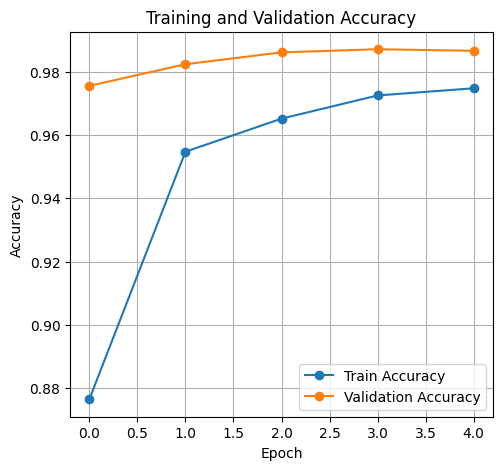

In [14]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.grid(True) 


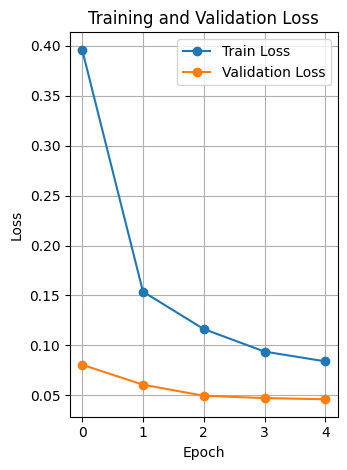

In [15]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.grid(True) 
plt.tight_layout() 
plt.show() 


In [16]:
predictions = model.predict(test_images) 
predicted_labels = np.argmax(predictions, axis=1) 


313/313 [==============================] - 2s 5ms/step


In [17]:
num_samples = 10 
plt.figure(figsize=(15, 4))


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

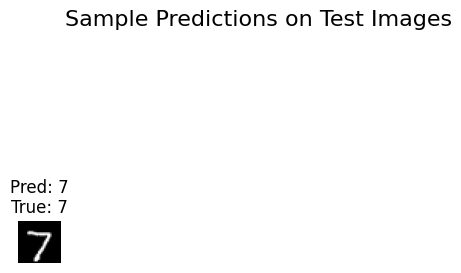

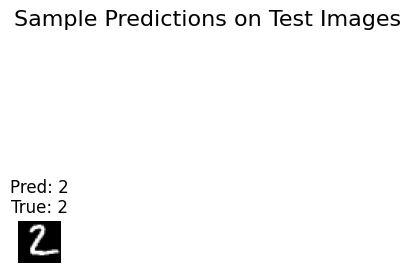

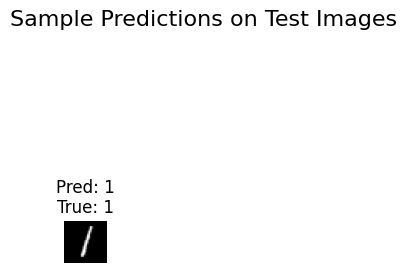

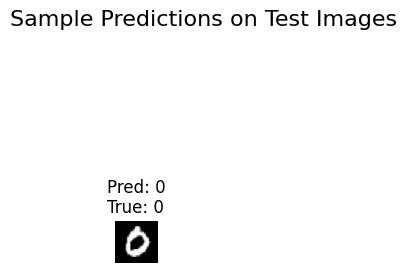

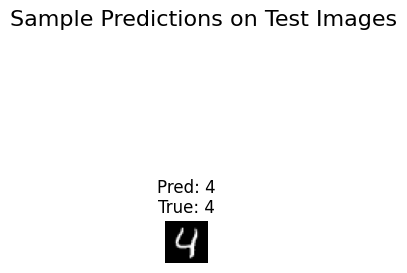

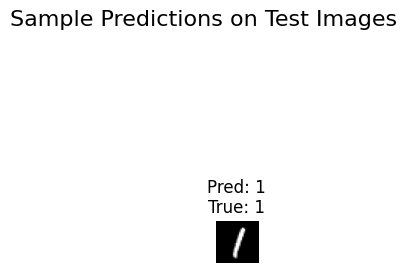

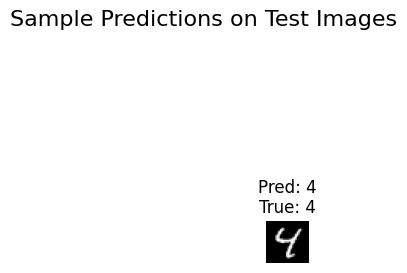

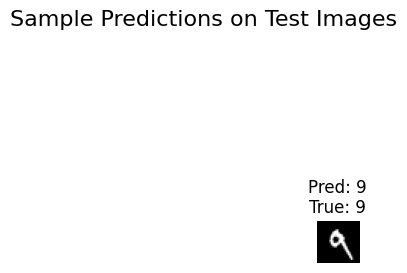

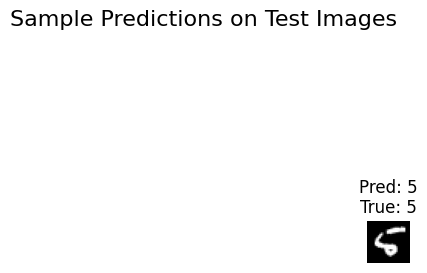

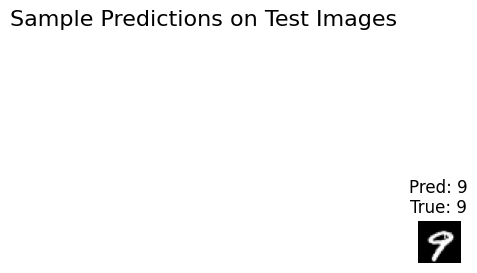

In [18]:
for i in range(num_samples): 
 plt.subplot(1, num_samples, i + 1) 
 plt.imshow(test_images[i].reshape(28, 28), cmap='gray') 
 plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")  
 plt.axis('off') 
 plt.suptitle("Sample Predictions on Test Images", fontsize=16) 
 plt.show()
